### Checking the installation

You can run the following code to check the versions of the packages on your system:

In [1]:
import numpy
print 'numpy:', numpy.__version__

import scipy
print 'scipy:', scipy.__version__

import matplotlib
print 'matplotlib:', matplotlib.__version__

import sklearn
print 'scikit-learn:', sklearn.__version__

numpy: 1.8.2
scipy: 0.13.3
matplotlib: 1.3.1
scikit-learn: 0.14.1


### Loading the Data with Scikit-Learn

Scikit-learn has a very straightforward set of data loading,we will look examples of loading Iris and Digit dataset.


#### Features in the Iris dataset:


sepal length in cm,
sepal width in cm,
petal length in cm,
petal width in cm,

#### Target classes to predict:

Iris Setosa,
Iris Versicolour,
Iris Virginica,




In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

iris.keys()
n_samples, n_features = iris.data.shape

print (n_samples, n_features)
print iris.data[0]
print iris.data.shape
print iris.target.shape
print iris.target_names

(150, 4)
[ 5.1  3.5  1.4  0.2]
(150, 4)
(150,)
['setosa' 'versicolor' 'virginica']


#### Loading Digits Data

Let's visualize the data. It's little bit more involved than the simple scatter-plot .

(1797, 64)
(1797, 64)
(1797, 8, 8)


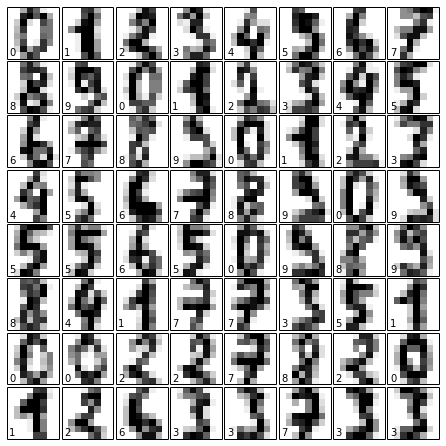

In [5]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

n_samples, n_features = digits.data.shape
print (n_samples, n_features)

print digits.data.shape
print digits.images.shape


# Visualize the Digit data point
import matplotlib.pyplot as plt
% matplotlib inline
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

### Supervised Learning: Classification and Regression

In Supervised Learning, we have a dataset consisting of both features and labels. The task is to construct an estimator which is able to predict the label of an object given the set of features. A relatively simple example is predicting the species of iris given a set of measurements of its flower. This is a relatively simple task. 

Supervised learning is further broken down into two categories, **classification** and **regression** In classification, the label is **discrete**, while in regression, the label is **continuous**. 



### K nearest neighbors (kNN)

K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

Let's try it out on our iris classification problem:

In [6]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
print iris.target_names[knn.predict([[3, 5, 4, 2]])]

['virginica']


### Support Vector Machine (SVM)

Support Vector Machines (SVMs) are a powerful supervised learning algorithm used for classification or for regression. SVMs are a discriminative classifier: that is, they draw a boundary between clusters of data.

Let's try it out on our iris classification problem:

In [8]:
from sklearn import svm,datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target
unknown_iris = [[3, 5, 4, 2]]
#Kernel could be rbf or linear or any other
clf=svm.SVC(kernel='linear')
clf.fit(X,y)
print iris.target_names[clf.predict(unknown_iris)]

['versicolor']


### Regression

The simplest possible regression setting is the linear regression one:

Model coefficient: 3.93491, and intercept: 1.46229


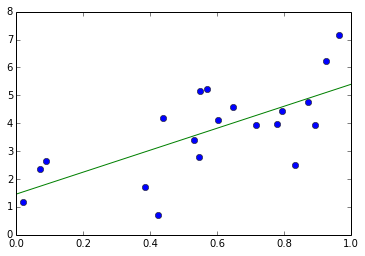

In [9]:
import numpy as np
# Create some simple data
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.normal(size=20)

# Fit a linear regression to it
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
print "Model coefficient: %.5f, and intercept: %.5f" % (model.coef_, model.intercept_)

# Plot the data and the model prediction
X_test = np.linspace(0, 1, 100)[:, np.newaxis]
y_test = model.predict(X_test)
import pylab as pl
plt.plot(X.squeeze(), y, 'o')
plt.plot(X_test.squeeze(), y_test);
